In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
data = pd.read_csv("../../standardized_datasets/2020-05-27_filtered_countries_julius_complete.csv", index_col=['country', 'date'])
data.drop(columns='cumulative_daily_change_total', inplace=True)
data.head()

confirmed  deaths  recovered  hdi_2018  \
country date                                                 
USA     2020-01-22        1.0     0.0        0.0      0.92   
        2020-01-23        1.0     0.0        0.0      0.92   
        2020-01-24        2.0     0.0        0.0      0.92   
        2020-01-25        2.0     0.0        0.0      0.92   
        2020-01-26        5.0     0.0        0.0      0.92   

                    population_total_2020  population_density_2020  \
country date                                                         
USA     2020-01-22             331002.647                   36.185   
        2020-01-23             331002.647                   36.185   
        2020-01-24             331002.647                   36.185   
        2020-01-25             331002.647                   36.185   
        2020-01-26             331002.647                   36.185   

                    cumulative_total  cumulative_total_per_thousand  retail  \
country date                                                                  
USA     2020-01-22               NaN                            NaN     NaN   
        2020-01-23               NaN                            NaN     NaN   
        2020-01-24               NaN                            NaN     NaN   
        2020-01-25               NaN                            NaN     NaN   
        2020-01-26               NaN                            NaN     NaN   

                    grocery and pharmacy  parks  transit stations  workplaces  \
country date                                                                    
USA     2020-01-22                   NaN    NaN               NaN         NaN   
        2020-01-23                   NaN    NaN               NaN         NaN   
        2020-01-24                   NaN    NaN               NaN         NaN   
        2020-01-25                   NaN    NaN               NaN         NaN   
        2020-01-26                   NaN    NaN               NaN         NaN   

                    residential  driving  transit  walking  pm2.5 value  
country date                                                             
USA     2020-01-22          NaN     3.01     1.06    -2.96          NaN  
        2020-01-23          NaN     7.90     3.29     0.83          NaN  
        2020-01-24          NaN    24.70    13.06    26.67          NaN  
        2020-01-25          NaN    20.92     1.88    39.61          NaN  
        2020-01-26          NaN   -12.68   -18.65   -10.10          NaN

In [2]:
germany = data.loc['Germany'].sort_values(by='date')
#pd.set_option('display.max_rows', 100)
germany = germany.loc['2020-02-15':'2020-05-02']
germany.interpolate(inplace=True, limit_area=None)
germany

confirmed  deaths  recovered  hdi_2018  population_total_2020  \
date                                                                        
2020-02-15       16.0     0.0        1.0     0.939              83783.945   
2020-02-16       16.0     0.0        1.0     0.939              83783.945   
2020-02-17       16.0     0.0        1.0     0.939              83783.945   
2020-02-18       16.0     0.0       12.0     0.939              83783.945   
2020-02-19       16.0     0.0       12.0     0.939              83783.945   
...               ...     ...        ...       ...                    ...   
2020-04-28   159912.0  6314.0   117400.0     0.939              83783.945   
2020-04-29   161539.0  6467.0   120400.0     0.939              83783.945   
2020-04-30   163009.0  6623.0   123500.0     0.939              83783.945   
2020-05-01   164077.0  6736.0   126900.0     0.939              83783.945   
2020-05-02   164967.0  6812.0   129000.0     0.939              83783.945   

            population_density_2020  cumulative_total  \
date                                                    
2020-02-15                  240.372               NaN   
2020-02-16                  240.372               NaN   
2020-02-17                  240.372               NaN   
2020-02-18                  240.372               NaN   
2020-02-19                  240.372               NaN   
...                             ...               ...   
2020-04-28                  240.372         2440358.0   
2020-04-29                  240.372         2440358.0   
2020-04-30                  240.372         2440358.0   
2020-05-01                  240.372         2440358.0   
2020-05-02                  240.372         2440358.0   

            cumulative_total_per_thousand  retail  grocery and pharmacy  \
date                                                                      
2020-02-15                            NaN     6.0                   1.0   
2020-02-16                            NaN     7.0                  10.0   
2020-02-17                            NaN     2.0                   2.0   
2020-02-18                            NaN     2.0                   2.0   
2020-02-19                            NaN     3.0                   0.0   
...                                   ...     ...                   ...   
2020-04-28                         29.127   -48.0                 -10.0   
2020-04-29                         29.127   -46.0                   1.0   
2020-04-30                         29.127   -34.0                  19.0   
2020-05-01                         29.127   -82.0                 -92.0   
2020-05-02                         29.127   -46.0                   3.0   

            parks  transit stations  workplaces  residential  driving  \
date                                                                    
2020-02-15   45.0              10.0         0.0         -1.0    28.00   
2020-02-16    9.0               6.0        -1.0          0.0     9.63   
2020-02-17    7.0               1.0        -2.0          0.0     8.00   
2020-02-18   10.0               1.0        -1.0          1.0     9.42   
2020-02-19    6.0              -1.0        -1.0          1.0    10.81   
...           ...               ...         ...          ...      ...   
2020-04-28   19.0             -43.0       -33.0         13.0   -30.96   
2020-04-29   12.0             -43.0       -33.0         13.0   -29.39   
2020-04-30   -8.0             -39.0       -34.0         12.0   -29.70   
2020-05-01   17.0             -67.0       -84.0         28.0   -37.54   
2020-05-02  -18.0             -42.0       -20.0          9.0   -34.09   

            transit  walking  pm2.5 value  
date                                       
2020-02-15    25.20    61.49         11.0  
2020-02-16    14.91    -1.32         11.0  
2020-02-17    57.64    11.55         11.0  
2020-02-18    40.18    15.71         11.0  
2020-02-19    32.15     9.61         11.0  
...             ...      ...      

In [3]:
def extrapolate(series):
    first_valid_entries=[0,0]
    i=0
    for entry in series:
        if i==2:
            break
        if np.isnan(entry)==False:
            first_valid_entries[i]=entry
            i=i+1

    gradient = first_valid_entries[1]-first_valid_entries[0]
    index = int(np.flatnonzero(series == first_valid_entries[0]))
    while index>0:
        series.iloc[index-1] = series.iloc[index] - gradient
        index = index - 1

    series[series < 0] = 0


extrapolate(germany.cumulative_total)
extrapolate(germany.cumulative_total_per_thousand)
germany
#germany.info()

confirmed  deaths  recovered  hdi_2018  population_total_2020  \
date                                                                        
2020-02-15       16.0     0.0        1.0     0.939              83783.945   
2020-02-16       16.0     0.0        1.0     0.939              83783.945   
2020-02-17       16.0     0.0        1.0     0.939              83783.945   
2020-02-18       16.0     0.0       12.0     0.939              83783.945   
2020-02-19       16.0     0.0       12.0     0.939              83783.945   
...               ...     ...        ...       ...                    ...   
2020-04-28   159912.0  6314.0   117400.0     0.939              83783.945   
2020-04-29   161539.0  6467.0   120400.0     0.939              83783.945   
2020-04-30   163009.0  6623.0   123500.0     0.939              83783.945   
2020-05-01   164077.0  6736.0   126900.0     0.939              83783.945   
2020-05-02   164967.0  6812.0   129000.0     0.939              83783.945   

            population_density_2020  cumulative_total  \
date                                                    
2020-02-15                  240.372               0.0   
2020-02-16                  240.372               0.0   
2020-02-17                  240.372               0.0   
2020-02-18                  240.372               0.0   
2020-02-19                  240.372               0.0   
...                             ...               ...   
2020-04-28                  240.372         2440358.0   
2020-04-29                  240.372         2440358.0   
2020-04-30                  240.372         2440358.0   
2020-05-01                  240.372         2440358.0   
2020-05-02                  240.372         2440358.0   

            cumulative_total_per_thousand  retail  grocery and pharmacy  \
date                                                                      
2020-02-15                          0.000     6.0                   1.0   
2020-02-16                          0.000     7.0                  10.0   
2020-02-17                          0.000     2.0                   2.0   
2020-02-18                          0.000     2.0                   2.0   
2020-02-19                          0.000     3.0                   0.0   
...                                   ...     ...                   ...   
2020-04-28                         29.127   -48.0                 -10.0   
2020-04-29                         29.127   -46.0                   1.0   
2020-04-30                         29.127   -34.0                  19.0   
2020-05-01                         29.127   -82.0                 -92.0   
2020-05-02                         29.127   -46.0                   3.0   

            parks  transit stations  workplaces  residential  driving  \
date                                                                    
2020-02-15   45.0              10.0         0.0         -1.0    28.00   
2020-02-16    9.0               6.0        -1.0          0.0     9.63   
2020-02-17    7.0               1.0        -2.0          0.0     8.00   
2020-02-18   10.0               1.0        -1.0          1.0     9.42   
2020-02-19    6.0              -1.0        -1.0          1.0    10.81   
...           ...               ...         ...          ...      ...   
2020-04-28   19.0             -43.0       -33.0         13.0   -30.96   
2020-04-29   12.0             -43.0       -33.0         13.0   -29.39   
2020-04-30   -8.0             -39.0       -34.0         12.0   -29.70   
2020-05-01   17.0             -67.0       -84.0         28.0   -37.54   
2020-05-02  -18.0             -42.0       -20.0          9.0   -34.09   

            transit  walking  pm2.5 value  
date                                       
2020-02-15    25.20    61.49         11.0  
2020-02-16    14.91    -1.32         11.0  
2020-02-17    57.64    11.55         11.0  
2020-02-18    40.18    15.71         11.0  
2020-02-19    32.15     9.61         11.0  
...             ...      ...      

In [4]:
germany.index = pd.to_datetime(germany.index)
germany = germany.resample('H').interpolate(limit_area=None)
#germany

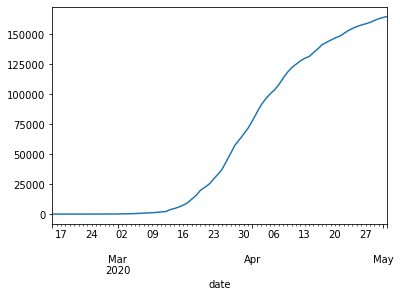

In [5]:
dataset = germany.confirmed
dataset.plot()

In [6]:
#temporary test dataset. REMOVE if models works perfectly
#dataset = pd.DataFrame([x for x in range(2000)], dtype='float32')
#dataset.plot()

In [7]:
#Defining characteristic variables
past = 10 #Past episodes to consider
future_target = 1

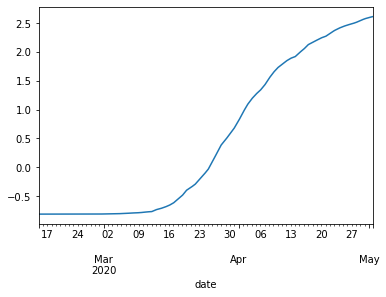

In [8]:
train_split_rows = int(dataset.shape[0]*0.8)


training_dataset = dataset[:train_split_rows]
mean = training_dataset.mean(axis=0)
std = training_dataset.std(axis=0)
dataset_scaled = ((dataset) - mean) / std
#dataset_scaled = dataset #TEMP
dataset_scaled.plot()

In [9]:
def split_rolling_window(df, past, future_target=1):
    data = []
    labels = []
    window_start = 0
    window_end = past
    while window_end <= df.shape[0]-future_target: 
        data.append(df.iloc[window_start:window_end].values)
        labels.append(df.iloc[window_end:window_end+future_target].values)
        window_start += 1
        window_end += 1
    
    
    X = np.stack(data)
    X = X.reshape(X.shape[0], X.shape[1], 1)
    y = np.stack(labels)
    return X,y
    
X, y = split_rolling_window(dataset_scaled, past)
print(X.shape)
y.shape

(1839, 10, 1)


(1839, 1)

In [10]:
def lstm_model(X, y, layer1, layer2, layer3, dropout, lr, epochs, val_split):
    np.random.seed(1234)
    tf.random.set_seed(1234)
    
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.LSTM(layer1, activation='relu', return_sequences=True, input_shape=X.shape[-2:]))
    model.add(tf.keras.layers.Dropout(dropout))
    model.add(tf.keras.layers.LSTM(layer2, return_sequences=True,activation='relu'))
    model.add(tf.keras.layers.LSTM(layer3, activation='relu'))
    model.add(tf.keras.layers.Dense(future_target))
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr), loss='mse')
    history = model.fit(X, y, epochs=epochs, validation_split=val_split, shuffle=True)
    return model, history

In [11]:
def plot_train_history(history, title):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(loss))

  plt.figure()

  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title(title)
  plt.legend()
  plt.ylim(ymax=1, ymin=0)
  plt.show()

#plot_train_history(history, 'Multi Step Training and validation loss')

def plot_predict(dataset_scaled, model):
    prediction = model.predict(np.reshape(dataset_scaled.tail(past).values,(1,past,1)))[0]
    plt.plot(list(range(-past,0)), np.array(dataset_scaled.tail(past).values), label='History')
    plt.plot(np.arange(future_target), np.array(prediction), 'ro', label='Predicted Future')
    plt.legend(loc='upper left')
    plt.show()
    
#plot_predict(dataset_scaled, model)


#series = dataset_scaled.tail(past).values
#print(series)
#x = np.reshape(series,(1,past,1))
#print(x, x.shape)
#prediction = model.predict(x)
#print(prediction)
def find_next(vals):
    """Linear extrapolation: finds next value from input numpy array"""
    gradient = vals[-1] - vals[-2]
    return vals[-1] + gradient

def unfoldList(list_):
    max_len = 1
    
    for entry in list_:
        if isinstance(entry, list):
            if len(entry)>max_len:
                max_len = len(entry)
    unfolded = [[] for i in range(max_len)]
    for i in range(max_len):
        for entry in list_:
            if isinstance(entry, list):
                unfolded[i].append(entry[i])
            else:
                unfolded[i].append(entry)
    return unfolded            

In [12]:
def hyperparameterTuning(df, X, y, layer1, layer2, layer3, dropout, lr, epochs, val_split):
    """Hyperparameter tuning for single step predictions"""
    series = df.tail(past).values
    target = find_next(series)
    print(target)
    results = pd.DataFrame.from_dict({'Layer1': [], 'Layer2': [], 'Layer3': [], 'Dropout': [], 'learning rate': [], 'epochs': [], 'val_split': [], 'TARGET DIFFERENCE': []})
    
    params = unfoldList([layer1, layer2, layer3,  dropout, lr, epochs, val_split])
    
    for iteration in params:
        print("Training model with parameters:", iteration)
        model, history = lstm_model(X, y, iteration[0], iteration[1], iteration[2], iteration[3], iteration[4], iteration[5], iteration[6])
        x = np.reshape(series,(1,past,1))
        prediction = model.predict(x)
        print(prediction)
        iteration.append(prediction-target)
        results = results.append(pd.Series(iteration, index=results.columns), ignore_index=True)
    
    
    return results
    
#hyperparameterTuning(dataset_scaled, X, y, layer1=110, layer2=90, dropout=0.2, lr=0.00005, epochs=100, val_split=0.25)


In [18]:
result = hyperparameterTuning(dataset_scaled, X, y, layer1=[30,35,40,45,50,55,60], layer2=90, layer3=74, dropout=0.22, lr=0.00005, epochs=100, val_split=0.25)
result.to_csv("results_layer1_30_60.csv")
result

2.613918167111032
Training model with parameters: [30, 90, 74, 0.22, 5e-05, 100, 0.25]
Train on 1379 samples, validate on 460 samples
Epoch 1/100
1379/1379 [==============================] - 16s 12ms/sample - loss: 0.7970 - val_loss: 5.0534
Epoch 2/100
1379/1379 [==============================] - 2s 2ms/sample - loss: 0.7537 - val_loss: 4.6084
Epoch 3/100
1379/1379 [==============================] - 2s 2ms/sample - loss: 0.6805 - val_loss: 3.7506
Epoch 4/100
1379/1379 [==============================] - 2s 2ms/sample - loss: 0.5445 - val_loss: 1.7571
Epoch 5/100
1379/1379 [==============================] - 2s 2ms/sample - loss: 0.2890 - val_loss: 1.9876
Epoch 6/100
1379/1379 [==============================] - 2s 1ms/sample - loss: 0.0960 - val_loss: 1.7460
Epoch 7/100
1379/1379 [==============================] - 2s 2ms/sample - loss: 0.0200 - val_loss: 1.0522
Epoch 8/100
1379/1379 [==============================] - 2s 2ms/sample - loss: 0.0103 - val_loss: 1.0992
Epoch 9/100
1379/1379 [=

KeyboardInterrupt: 

In [14]:
#model = lstm_model(X, y, layer1=130, layer2=90, layer3=[5, 10, 15, 20, 25, 30], dropout=0.22, lr=0.00005, epochs=100, val_split=0.25)[0]
#plot_predict(dataset_scaled, model)